# Simulating Pandemics with MCMC Simualtions

## Stage one. Simulate the SIS model
* The transition probabilities in these models are not static. 
* We have to reculate the probabilites depending on the state of the system
* 


In [1]:
from random import uniform
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
def calculate_increase_prop(i, beta, N, delta_t):
    return beta * i * (N - i) / N * delta_t

In [ ]:
def calculate_recovered_prop(i, gamma, delta_t):
    return gamma * i * delta_t

In [ ]:
def run_SIS_simulation(beta=0.5, gamma=0.52, N=1000, delta_t=1, iterations=10000, i_start=1):
    i_list = [i_start]
    s_list = [N - i_list[-1]]
    for n in range(0, iterations):
        i = i_list[-1]
        s = s_list[-1]
        increase_prob = calculate_increase_prop(i, beta, N, delta_t)
        decrease_prob = calculate_recovered_prop(i, gamma, delta_t)
        no_change_prob = 1 - increase_prob - decrease_prob
        u = uniform(0, 1)
        if u < increase_prob:
            i_new = i + 1
            s_new = s - 1
        elif u > increase_prob and u < (increase_prob + decrease_prob):
            i_new = i - 1
            s_new = s + 1
        else:
            i_new = i
            s_new = s
        
        i_list.append(i_new)
        s_list.append(s_new)
    return np.arange(0, iterations*delta_t + delta_t, delta_t), i_list, s_list

In [ ]:
for sim in range(1, 7):
    t, i, s = run_SIS_simulation(gamma=0.04, beta=0.08, delta_t=0.01, iterations=100000)
    plt.figure()
    plt.title(f'Simulation {sim:0d}')
    plt.plot(t, i, label='infected')
    plt.plot(t, s, label='suseptible')
    plt.legend()

# Multiple Epidemic MCMC Modeling

* Let $K^{(v)}_t$ be the number of people immune to a virus $v$ at timepoint $t$. 
* Let $S^{v}_t$ be the number of people suseptible to a virus at timepoint $t$.
* Let $I^{v}_t$ be the number of people infected wtih a virus at time point $t$. 
* Let $K^{(0)}_t = N\ \forall\ t > 0$ Representing the entire population

In [2]:
timepoints = 1000
N = 1_000
K = np.zeros((3, timepoints))
S = np.zeros((3, timepoints))
I = np.zeros((3, timepoints))
beta = 0.5
gamma = 0.052
K[0, :] = N


$\frac{\Delta {K}^{(v)}_t}{\Delta t}=\frac{\beta I^{(v)}_tS^{(v)}_t}{n}$

In [3]:
def deltaK(I, S, N, beta):
    return  beta * I * S / N


$\frac{\Delta I^{(v)}_t}{\Delta t}=\frac{\beta I^{(v)}_tS^{(v)}_t}{n}-\gamma I = \frac{\Delta K}{\Delta t} - \frac{\Delta R}{\Delta t}$

In [4]:
def deltaI(I, S, N, gamma):
    return  beta * I * S / N - gamma * I

$\frac{\Delta R^{(v)}_t}{\Delta t}=\gamma I$

In [5]:
def deltaR(I, gamma):
    return gamma * I

In [60]:
def calc_S(R, K, alpha):
    s = np.zeros_like(R)
    select = np.ones((len(R), len(R)), dtype=bool)
    np.fill_diagonal(select, False)
    RMS = (R - K) * alpha
    for i in range(len(s)):
        s[i] = np.sum(RMS[select[i, :]], axis=0)
    return s


In [61]:
from numpy.random import uniform

In [199]:
# change these parameters to see what happens! 
timepoints = 10000
n_vars = 5
N = 1_000
K = np.zeros((n_vars, timepoints))
S = np.zeros((n_vars, timepoints))
I = np.zeros((n_vars, timepoints))
R = np.zeros((n_vars, timepoints))
alpha = np.ones((n_vars, timepoints)) * 0.5 # how much immunity is encured by getting one variant
beta = np.ones((n_vars, timepoints)) * 10.1
gamma = np.ones((n_vars, timepoints)) * 0.0005
# special case for healthy case
gamma[0, :] = 0
alpha[0, :] = 0 
K[0, :] = N

# set initial conditions for other cases
I[1:, 0] = 1
S[:, 0] = N

for i in range(1, timepoints):
    u1 = np.random.uniform(0, 1, size=n_vars)
    dK = (u1 < deltaK(I[:, i - 1], S[:, i - 1], N, beta[:, i-1])).astype('int')
    K[:, i] = dK + K[:, i - 1]
    u2 = np.random.uniform(0, 1, size=(n_vars))
    dR = (u2 < deltaR(I[:, i - 1], gamma[:, i-1])).astype('int')
    R[:, i] = dR + R[:, i -1]
    I[:, i] = I[:, i - 1] + dK - dR
    S[:, i] = calc_S(R[:, i-1], S[:, i-1], alpha[:, i -1])

/var/folders/x3/gpdd4yds209b7gltxchcxcd00000gn/T/ipykernel_34087/2536851157.py:2: RuntimeWarning: overflow encountered in multiply
  return  beta * I * S / N
/Users/dexter/Dropbox/Code/DiseaseModeling/.venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/x3/gpdd4yds209b7gltxchcxcd00000gn/T/ipykernel_34087/2536851157.py:2: RuntimeWarning: invalid value encountered in multiply
  return  beta * I * S / N
/var/folders/x3/gpdd4yds209b7gltxchcxcd00000gn/T/ipykernel_34087/2958890017.py:5: RuntimeWarning: invalid value encountered in multiply
  RMS = (R - K) * alpha


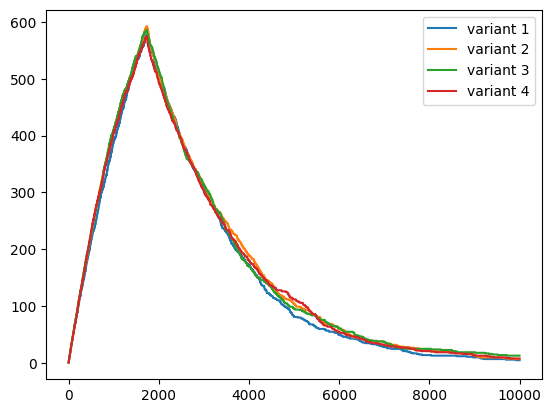

In [198]:
plt.figure()
for i, row in enumerate(I[1:], 1):
    plt.plot(row, label=f'variant {i}')
plt.legend()

In [157]:
def run_SIS_simulation(beta=0.5, gamma=0.52, N=1000, delta_t=1, iterations=10000, i_start=1):k
    i_list = [i_start]
    s_list = [N - i_list[-1]]
    for n in range(0, iterations):
        i = i_list[-1]
        s = s_list[-1]
        increase_prob = calculate_increase_prop(i, beta, N, delta_t)
        decrease_prob = calculate_recovered_prop(i, gamma, delta_t)
        no_change_prob = 1 - increase_prob - decrease_prob
        u = uniform(0, 1)
        if u < increase_prob:
            i_new = i + 1
            s_new = s - 1
        elif u > increase_prob and u < (increase_prob + decrease_prob):
            i_new = i - 1
            s_new = s + 1
        else:
            i_new = i
            s_new = s
        
        i_list.append(i_new)
        s_list.append(s_new)
    return np.arange(0, iterations*delta_t + delta_t, delta_t), i_list, s_list

IndentationError: unexpected indent (4125504159.py, line 2)